In [8]:
#自助聚合
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import matplotlib.pyplot
import sklearn.metrics as sm

data=[]
with open('../ml_data/bike_day.csv','r') as f:
    for line in f.readlines():
        data.append(line[:-1].split(','))
#整理输入与输出集
day_header =np.array(data[0][2:13])
x=np.array(data[1:])[:,2:13].astype('f8')
y=np.array(data[1:])[:,-1].astype('f8')
#打乱数据集，拆分训练集与测试集
x,y=su.shuffle(x,y,random_state=7)
train_size=int(len(x)*0.9)
train_x,test_x,train_y,test_y=\
    x[:train_size],x[train_size:],\
    y[:train_size],y[train_size:]
#训练随机森林模型
model=se.RandomForestRegressor(max_depth=10,n_estimators=1000,min_samples_split=2)
model.fit(train_x,train_y)
#输出预测结果r2得分
pred_test_y=model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))  #回归模型评价指标
day_fi=model.feature_importances_
print(sm.mean_absolute_error(test_y,pred_test_y))  #平均绝对值误差

0.8927965580631372
428.09872234606877


0.9184025376751039


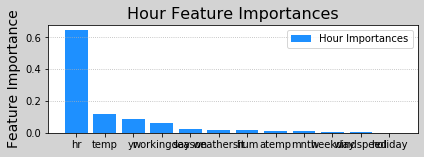

In [12]:
#自助聚合
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import matplotlib.pyplot
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=[]
with open('../ml_data/bike_hour.csv','r') as f:
    for line in f.readlines():
        data.append(line[:-1].split(','))
#整理输入与输出集
hour_header =np.array(data[0][2:14])
x=np.array(data[1:])[:,2:14].astype('f8')
y=np.array(data[1:])[:,-1].astype('f8')
#打乱数据集，拆分训练集与测试集
x,y=su.shuffle(x,y,random_state=7)
train_size=int(len(x)*0.9)
train_x,test_x,train_y,test_y=\
    x[:train_size],x[train_size:],\
    y[:train_size],y[train_size:]
#训练随机森林模型
model=se.RandomForestRegressor(max_depth=10,n_estimators=1000,min_samples_split=2)
model.fit(train_x,train_y)
#输出预测结果r2得分
pred_test_y=model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))  #回归模型评价指标
hour_fi=model.feature_importances_


#画图，绘制重要特征
mp.figure('Feature Importance',facecolor='lightgray')
mp.subplot(211)#子图    2行1列，第一副
mp.title('Hour Feature Importances',fontsize=16) 
mp.ylabel('Feature Importance',fontsize=14)
mp.grid(linestyle=":",axis='y') 
x=np.arange(hour_fi.size)
sorted_indices=hour_fi.argsort()[::-1]    #argsort函数返回的是数组值从小到大的索引值    [::-1]  倒序
hour_fi=hour_fi[sorted_indices]
mp.bar(x,hour_fi,0.8,color='dodgerblue',label='Hour Importances')
mp.xticks(x,hour_header[sorted_indices])

mp.legend()
mp.tight_layout()
mp.show()